In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import random
random.seed(4)

Text(0.5, 1.0, 'Original sine function with data points')

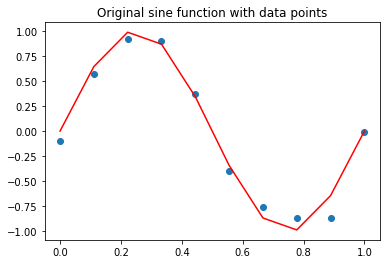

In [2]:
x_i = np.linspace(0,1,10)
y_i = np.sin(2*(np.pi)*x_i) + np.random.normal(scale=0.1, size=[x_i.shape[0]])
t = np.sin(2*(np.pi)*x_i)
a = np.ones(10)
phi = np.dstack((a,x_i))
plt.scatter(x_i, y_i)
plt.plot(x_i, t, color='red')
plt.title('Original sine function with data points')

In [3]:
def E_and_V(x,X,t,sigma):
    pdf_vals = norm.pdf(x - X.reshape(10,1), loc = 0, scale = sigma).T
    pdf_vals = pdf_vals/(pdf_vals.sum(axis = 1,keepdims=True))

    Expectation = (pdf_vals * t.reshape(1,10)).sum(axis = 1)
    Cond_Var = np.sqrt(sigma **2 +  (pdf_vals * t.reshape(1,10) **2).sum(axis = 1) - Expectation **2)
    return Expectation, Cond_Var

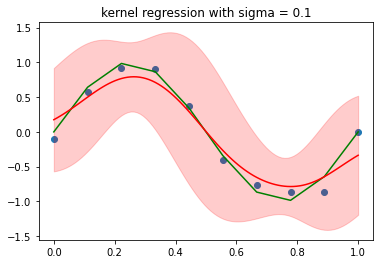

In [15]:
x_test = np.linspace(0,1,100)
sigma = 0.1
E,V = E_and_V(x_test,x_i,y_i,sigma)
plt.scatter(x_i, y_i)
plt.plot(x_i, t, color='green')
plt.plot(x_test,E,color='red')
plt.fill_between(x_test,E - 2*V, E + 2*V, alpha = 0.2, color='red')
plt.title('kernel regression with sigma = 0.1')
plt.savefig('kernel-regression.jpg')